In [1]:
#importing all libraries
import numpy as np
import pandas as pd 
import pandas as pd
import numpy as np
import nltk
import random
import os
from sklearn.model_selection import train_test_split
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [2]:
# setting gpu
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [3]:

print(os.listdir())

['.ipynb_checkpoints', 'keras_model.py', 'pos_tagger.ipynb']


In [4]:
def prepare_data(file_name):
    
    '''prepareing data to required form'''
    
    count_tagged_words = 0
    tagged_sentence = []
    with open(os.path.join('../input',file_name)) as f: 
        i  =0
        for line in f:
            if line.strip()=='':
                pass
            else:
                tagged_sent = [nltk.tag.str2tuple(t) for t in line.split()]
                tagged_sentence.append(tagged_sent) 
                count_tagged_words +=  len(tagged_sent)

    print('\ntagged sentence in %s  %s '%(file_name,len(tagged_sentence)))
    print('tagged words in %s  %s '%(file_name,count_tagged_words))
    return tagged_sentence


In [5]:
def custom_features(sentence, loc):
    
    '''defining features'''
    
    return {
        'word': sentence[loc],
        'is_first': loc == 0,
        'is_last': loc == len(sentence) - 1,
        'is_all_caps': sentence[loc].upper() == sentence[loc],
        'is_all_lower': sentence[loc].lower() == sentence[loc],
        'first_prefix': sentence[loc][0],
        'second_prefix': sentence[loc][:2],
        'third_prefix': sentence[loc][:3],
        'first_suffix': sentence[loc][-1],
        'second_suffix': sentence[loc][-2:],        
        'suffix-3': sentence[loc][-3:],
        'is_capitalized': sentence[loc][0].upper() == sentence[loc][0],
        'prev_word': '' if loc == 0 else sentence[loc - 1],
        'next_word': '' if loc == len(sentence) - 1 else sentence[loc + 1],
        'hyphen_present': '-' in sentence[loc],
        'is_numeric': sentence[loc].isdigit(),
        'capitals_inside': sentence[loc][1:].lower() != sentence[loc][1:]
    }

In [6]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [7]:
def transform_to_dataset(tagged_sentences):
    
    '''
    transforming data
    '''
    X, y = [], []
 
    for tagged in tagged_sentences:
        for i in range(len(tagged)):
            X.append(custom_features(untag(tagged), i))
            y.append(tagged[i][1])
    
    c = list(zip(X, y))

    random.shuffle(c)

    X, y = zip(*c)
    return X, y

In [12]:
def decision_tree(X,y):
    
    '''defining decision tree'''
    
    decision_clf = Pipeline([('vectorizer', DictVectorizer(sparse=False)),('classifier', DecisionTreeClassifier(criterion='entropy'))])
    decision_clf.fit(X, y)
    print('Training completed')
    return decision_clf

def random_tree(X, y):
    
    '''random_classifier'''
    
    random_clf =  Pipeline([('vectorizer', DictVectorizer(sparse=False)),('classifier', RandomForestClassifier(n_estimators=200, max_depth=50,random_state=0))])
     
    random_clf.fit(X, y)
    print('Training completed')
    return random_clf



In [68]:
# preparing training datasety
train_file ='train.txt'
training_set =  prepare_data(train_file)

# dividing dataset into training set and test set 
cutoff = int(.75 * len(training_set))
training_sentences = training_set[:cutoff]
test_sentences = training_set[cutoff:]
print('\nnumber of sentences in training set %s,\n number of sentences in test set %s'%(len(training_sentences),len(test_sentences))) 

# Transforming dataset
X_train, y_train = transform_to_dataset(training_sentences)
print('\nnumber of words in training set = %s'%(len(X_train)))
X_test, y_test = transform_to_dataset(test_sentences)
print('number of words in test set = %s'%(len(X_test)))

eval_file ='test.tag' 
eval_set =  prepare_data(eval_file)
X_eval, y_eval = transform_to_dataset(eval_set)

print('number of words in eval set = %s'%(len(X_eval)))



tagged sentence in train.txt  10388 
tagged words in train.txt  228333 

number of sentences in training set 7791,
 number of sentences in test set 2597

number of words in training set = 165816
number of words in test set = 62517

tagged sentence in test.tag  29 
tagged words in test.tag  892 
number of words in eval set = 892


In [10]:
# due to less machine computation power training on less data
cut_off = 10000

In [11]:

# training decision tree

decision_clf  = decision_tree(X_train[:cut_off],y_train[:cut_off])
print("Accuracy  over test set", decision_clf.score(X_test,y_test))


print(" stats---- over evalvation set---")

y_predicted = decision_clf.predict(X_eval)
accuracy  = accuracy_score(y_eval, y_predicted)
precision  = precision_score(y_eval, y_predicted,average = 'weighted')
recall_score  = recall_score(y_eval, y_predicted,average = 'weighted')
f1_score  = f1_score(y_eval, y_predicted,average = 'weighted')
print('accuracy %s, precision %s, recall_score %s,f1_score %s'%(accuracy,precision,recall_score,f1_score))



#WRITING FILE
accuracy_file = open(os.path.join('../output','accuracy.txt'),'a+')
accuracy_file.write('---decision_tree---\n\n')
accuracy_file.write('accuracy = '+ str(accuracy)+"\n")
accuracy_file.write('precision = '+ str(precision)+"\n")
accuracy_file.write('recall_score = '+ str(recall_score)+"\n")
accuracy_file.write('f1_score = '+ str(f1_score)+"\n\n\n")
accuracy_file.close()


Training completed
Accuracy  over test set 0.82859062335
 stats---- over evalvation set---
accuracy 0.862107623318, precision 0.871314775005, recall_score 0.862107623318,f1_score 0.859633559493


/home/sudeep/anaconda3/envs/sudeepenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sudeep/anaconda3/envs/sudeepenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/sudeep/anaconda3/envs/sudeepenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sudeep/anaconda3/envs/sudeepenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, war

In [13]:
# training random_tree 

random_clf  = random_tree(X_train[:cut_off],y_train[:cut_off])
print("Accuracy  over test set", random_clf.score(X_test,y_test))

print("Accuracy  over eval set", random_clf.score(X_eval,y_eval))

#WRITING FILE
accuracy_file = open(os.path.join('../output','accuracy.txt'),'a+')
accuracy_file.write('---random_tree---\n\n')
accuracy_file.write('accuracy = '+ str(accuracy)+"\n")
accuracy_file.write('precision = '+ str(precision)+"\n")
accuracy_file.write('recall_score = '+ str(recall_score)+"\n")
accuracy_file.write('f1_score = '+ str(f1_score)+"\n\n\n")
accuracy_file.close()


Training completed
Accuracy  over test set 0.792520434442
Accuracy  over eval set 0.834080717489


### building deep network 

In [51]:
#import keras model

%load_ext autoreload
%autoreload
%aimport keras_model


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               20716544  
_________________________________________________________________
activation_22 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dense_44 (Dense)             (None, 207)               106191    
Total params: 20,824,783
Trainable params: 20,823,759
Non-trainable params: 1,024
_________________________________________________________________
Train on 54537 samples, validate on 7791 samples
Epoch 1/15
 - 45s - loss: 0.5836 - acc: 0.8669 - f1_m: 0.8576 - precision_m: 

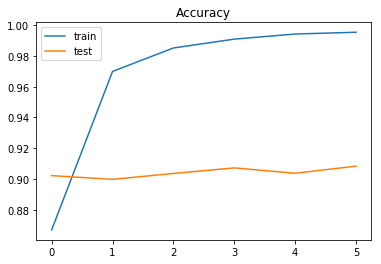

In [54]:
model = keras_model.deep_keras_model(X_train[:7*cutoff], y_train[:7*cutoff],X_test[:cutoff], y_test[:cutoff],X_eval,y_eval,epochs = 15)

model.model.save(os.path.join('../output','model.h5'))

In [60]:
def predict(X_predict):
    
    '''prediction function'''
    
    file = open("label_encoder.obj",'rb')
    label_encoder = pickle.load(file)

    file = open("dict_vectorizer.obj",'rb')
    dict_vectorizer = pickle.load(file)
    
    prediction_test = model.predict(X_predict)
    predictions_test = label_encoder.inverse_transform(prediction_test)
    return predictions_test

In [96]:
file_name = 'res.txt'

res = open(os.path.join('../output','test.out'),'a+')
str__ = ''
with open(os.path.join('../input','test.txt'),'r+') as f: 
    for line in f:
        if line.strip()=='':
            pass
        else:
            tagged_sent = [nltk.tag.str2tuple(t) for t in line.split()]
            X_test_, y_test_ = transform_to_dataset([tagged_sent])
            X_predict = dict_vectorizer.transform(X_test_)
            predicted = predict(X_predict)

            line_ = list(zip(line.split(), predicted))
            result.append([str(i[0]+'/'+i[1]+" ") for i in line_])
            str_ = ''
            for i in range(len(line_)):
                
                str_  = str_+ line_[i][0] +'/'+line_[i][1]+" "
#         print(str_.strip())
        res.write(str_.strip())
        res.write('\n')
        

res.close()
f.close()
            